<a href="https://colab.research.google.com/github/skredenmathias/DS-Unit-1-Sprint-2-Statistics/blob/master/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [0]:
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None, names=column_headers, na_values ="?")
df.head()

In [0]:
df = df.replace({'y': 1, 'n': 0})
df.head()

In [5]:
df['party'].value_counts()

democrat      267
republican    168
Name: party, dtype: int64

In [0]:
rep = df[df['party']=='republican']
rep.head()

In [0]:
dem = df[df['party']=='democrat']
dem.head()

In [0]:
# 1. Generate and numerically represent a confidence interval
# 2. Graphically (with a plot) represent the confidence interval
# 3. Interpret the confidence interval - what does it tell you about the data and its distribution?

In [0]:
# 1
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1)/np.sqrt(n)
  moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean - moe, mean, mean + moe)

In [28]:
confidence_interval(df['education'].dropna())

(0.37488391760148726, 0.42326732673267325, 0.47165073586385925)

In [0]:
df['education'].head()

In [0]:
# Checking the function
coinflips_100 = np.random.binomial(n=1, p=.5, size=100)
coinflips_100

In [13]:
confidence_interval(coinflips_100)

(0.400289346502771, 0.5, 0.599710653497229)

In [0]:
df.head()

In [111]:
#2 Graphically (with a plot) represent the confidence interval

# Skipping this code as to not screw with my variablenames.
# from scipy.stats import t

# immigration = dem['education'].dropna()
# n = len(education)
# mean = immigration.mean()
# sample_std = immigration.std()
# std_err = sample_std/n**.5
# # std_err = sample_std/np.sqrt(n)

# CI_immigration = t.interval(.95, n-1, loc=mean, scale=std_err)
# print("95% Confidence Interval: ", CI_immigration)

# sns.kdeplot(education)
# CI = confidence_interval(dem['education'])
# plt.axvline(x=CI_education[0], color='red')
# plt.axvline(x=CI_education[1], color='red')
# plt.axvline(x=mean, color='k')

NameError: ignored

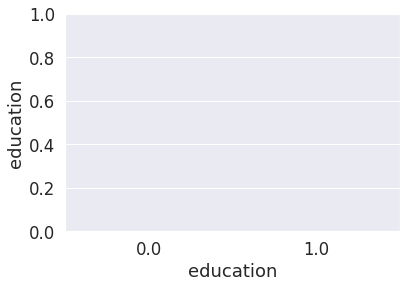

In [91]:
sns.boxplot(x=dem168['education'], y=rep['education'])

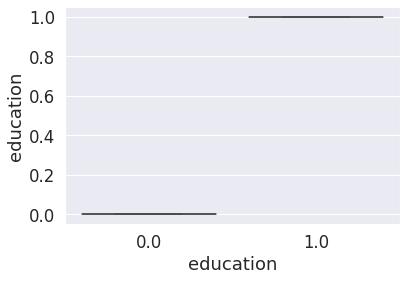

In [108]:
sns.boxplot(
    x = 'education',
    y = 'education',
    data = dem
)

In [0]:
# Getting equal sample sizes
dem168 = dem.iloc[0:168]

In [83]:
rep.shape
# Successful code starts here, #2
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1)/np.sqrt(n)
  moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean - moe, mean, mean + moe)

(168, 17)

In [0]:
def confidence_interval_dataframe(df):
  
  confidence_intervals = []
  
  # Turn dataframe into a numpy array
  # List values by column and not by row
  df = df.values.T
  
  # Remove nan values from columns
  cleaned_df = []
  for col in df:
    cleaned_col = col[~np.isnan(col)]
    
    # Calculate Confidence interval for each issue
    confidence_intervals.append(confidence_interval(cleaned_col))
    
  confidence_intervals = pd.DataFrame(confidence_intervals, columns=['mean', 'lower', 'upper'])  # look into this
    
  return confidence_intervals

# We only want the issue columns not the string "party" column
only_votes = dem.drop('party', axis='columns')

confidence_interval_df = confidence_interval_dataframe(only_votes)
confidence_interval_df.head(20)

In [110]:
confidence_interval_df['margin_of_error'] = confidence_interval_df['upper'] - confidence_interval_df['mean'] # look into this
print(confidence_interval_df.shape)
confidence_interval_df.head() # note different result due to different CI calculation

(16, 4)


,mean,lower,upper,margin_of_error
0,0.544593,0.604651,0.664710,0.120117
1,0.438245,0.502092,0.565939,0.127694
2,0.849944,0.888462,0.926980,0.077036
3,0.026332,0.054054,0.081776,0.055444
4,0.164863,0.215686,0.266509,0.101646


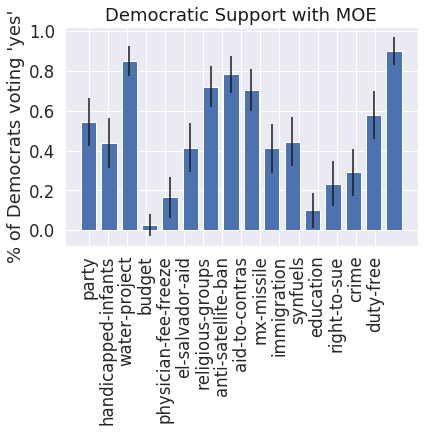

In [113]:
x = np.linspace(0, confidence_interval_df.shape[0], confidence_interval_df.shape[0])
y = confidence_interval_df['mean']
yerr = confidence_interval_df['margin_of_error']

fig, ax = plt.subplots()
means = confidence_interval_df['mean']
error = confidence_interval_df['margin_of_error']
x_pos = np.arange(confidence_interval_df.shape[0])
issues = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

# Matplotlib Named Colors: https://matplotlib.org/2.0.0/examples/color/named_colors.html
ax.bar(x, means, yerr=error)
ax.set_ylabel("% of Democrats voting 'yes'")
ax.set_xticks(x_pos)
ax.set_xticklabels(issues)
ax.set_title('Democratic Support with MOE', color='k')
ax.yaxis.grid(True)

# Save the figure and show
# Different style sheets: https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html
plt.style.use('ggplot')
plt.tight_layout()
plt.xticks(rotation=90)
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [0]:
# The confidence interval is similar for most bills voted on.
# I'd take this to mean that there is significant variance in our data & our sample sizes are on the small side.
# The CI is smaller on issues that there is high levels of agreement on, see: budget, duty-free.

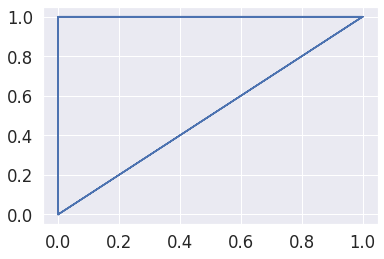

In [95]:
fig = plt.figure
x = dem168['education']
y = rep['education']
# yerr = 
# plt.errorbar
plt.errorbar(x,y)
plt.show()

In [17]:
# Take a dataset that we have used in the past in class that has categorical variables. 
# Pick two of those categorical variables and run a chi-squared tests on that data
# 1. By hand using Numpy
# 2. In a single line using Scipy

column_headers = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class:']

iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=column_headers)
iris.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class:
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
iris['sepal length in cm'].describe()
cut_points = [4.3, 5.1, 5.8, 6.4, 7.9]
label_names= ['4.3-5.1', '5.1-5.8', '5.8-6.4', '6.4-7.9']
iris['sepal length in cm'] = pd.cut(iris['sepal length in cm'], cut_points, labels=label_names)
iris.head()


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class:
0,4.3-5.1,3.5,1.4,0.2,Iris-setosa
1,4.3-5.1,3.0,1.4,0.2,Iris-setosa
2,4.3-5.1,3.2,1.3,0.2,Iris-setosa
3,4.3-5.1,3.1,1.5,0.2,Iris-setosa
4,4.3-5.1,3.6,1.4,0.2,Iris-setosa


In [19]:
iris['class:'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class:, dtype: int64

In [20]:
iris['sepal length in cm'].value_counts()

4.3-5.1    40
5.1-5.8    39
6.4-7.9    35
5.8-6.4    35
Name: sepal length in cm, dtype: int64

In [21]:
# 2: Scipy

observed = pd.crosstab(iris['class:'], iris['sepal length in cm'])

observed # why not contingency? margins?

sepal length in cm,4.3-5.1,5.1-5.8,5.8-6.4,6.4-7.9
class:,,,,
Iris-setosa,35,14,0,0
Iris-versicolor,4,20,17,9
Iris-virginica,1,5,18,26


In [22]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected: \n", np.array(expected))

chi-Squared: 109.79362454212456
P-value: 2.251647593342648e-21
Degrees of Freedom: 6
Expected: 
 [[13.15436242 12.82550336 11.51006711 11.51006711]
 [13.42281879 13.08724832 11.74496644 11.74496644]
 [13.42281879 13.08724832 11.74496644 11.74496644]]


In [35]:
# Chi-square by hand / numpy
contigency_table = pd.crosstab(iris['class:'], iris['sepal length in cm'], margins=True)
contigency_table

sepal length in cm,4.3-5.1,5.1-5.8,5.8-6.4,6.4-7.9,All
class:,,,,,
Iris-setosa,35,14,0,0,49
Iris-versicolor,4,20,17,9,50
Iris-virginica,1,5,18,26,50
All,40,39,35,35,149


In [42]:
# grab the crosstab cells that correspond to setosa
setosa = contigency_table.iloc[0][0:4].values
setosa

array([35, 14,  0,  0])

In [43]:
versicolor = contigency_table.iloc[1][0:4].values
versicolor

array([ 4, 20, 17,  9])

In [0]:
virginica = contigency_table.iloc[2][0:4].values

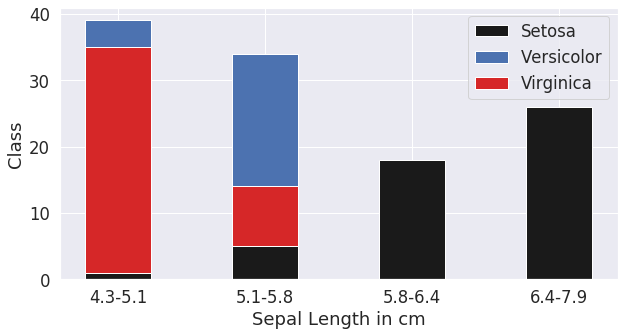

In [56]:
fig = plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
categories = ['4.3-5.1', '5.1-5.8', '5.8-6.4', '6.4-7.9']
p1 = plt.bar(categories, setosa, 0.45, color='#d62728')
p2 = plt.bar(categories, versicolor, 0.45, bottom=setosa)
p3 = plt.bar(categories, virginica, 0.45, color = 'k')
plt.legend((p3[0], p2[0], p1[0]), ('Setosa', 'Versicolor', 'Virginica'))
plt.xlabel('Sepal Length in cm')
plt.ylabel('Class')
plt.show() # Versicolor is being 'overshadowed' by Setosa. How 2 fix?

In [0]:
# sns.boxplot(x=iris['class:'], y=iris['sepal length in cm'], palette="Blues")

In [59]:
# Expected value calculation
# Calculate row and column totals to use in the expected value calculations
row_sums = contigency_table.iloc[0:3, 4].values
col_sums = contigency_table.iloc[3, 0:4].values
print(row_sums)
print(col_sums)

[49 50 50]
[40 39 35 35]


In [60]:
total = contigency_table.loc['All', 'All']
total

149

In [62]:
# can also be grabbed from dataframe
iris.shape[0] # hmm

150

In [65]:
# calculate expected values
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)

# Shape should match contigency table
print(expected.shape)
#should match scipy results
print(expected)

(3, 4)
[[13.15436242 12.82550336 11.51006711 11.51006711]
 [13.42281879 13.08724832 11.74496644 11.74496644]
 [13.42281879 13.08724832 11.74496644 11.74496644]]


In [66]:
print(observed.shape)
observed

(3, 4)


sepal length in cm,4.3-5.1,5.1-5.8,5.8-6.4,6.4-7.9
class:,,,,
Iris-setosa,35,14,0,0
Iris-versicolor,4,20,17,9
Iris-virginica,1,5,18,26


In [74]:
# Chi-squared w/numpy (but wait, there's more!)
# Array broadcasting will work with numpy arrays but not python lists
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}") # Why am i not getting the chi squared statistic?

Chi-Squared: sepal length in cm
4.3-5.1    54.391500
5.1-5.8     8.756410
5.8-6.4    17.192571
6.4-7.9    29.453143
dtype: float64


In [75]:
#DoF = (num_rows -1)(num_columns -1)
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")

Degrees of Freedom: 6


In [77]:
from scipy.stats.distributions import chi2
print("P-value from chi^2 statistic:", chi2.sf(chi_squared, 6))

P-value from chi^2 statistic: [6.15062274e-10 1.87747926e-01 8.60097166e-03 4.99254313e-05]


In [24]:
iris.describe(exclude='number')

,sepal length in cm,class:
count,149,150
unique,4,3
top,4.3-5.1,Iris-setosa
freq,40,50


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)